# PHASE 1 MILESTONE 2

# 1. Introduction

* Name : Ajeng Nilta Adriani
* Batch : FTDS - 002

Link Hugging Face : https://huggingface.co/spaces/Ajeng/ajeng_miles

### About The Dataset 

Data ini berasal dari Institut Nasional Diabetes dan Pencernaan dan Penyakit Ginjal. Tujuan dari kumpulan data ini adalah untuk memprediksi secara diagnostik apakah seorang pasien menderita diabetes, berdasarkan pengukuran diagnostik tertentu yang termasuk dalam kumpulan data. Beberapa kendala ditempatkan pada pemilihan instance ini dari database yang lebih besar. Secara khusus, semua pasien di sini adalah perempuan berusia minimal 21 tahun keturunan Indian. Kita dapat menemukan beberapa Fitur, beberapa di antaranya Independen (beberapa Fitur Prediktor Medis) dan hanya satu variabel Dependen Target (Outcome).

Pertama-tama akan meninjau kolom kumpulan data untuk memahami Fitur dan melihat apakah perlu ada perubahan. Ini adalah informasi yang disediakan untuk kolom oleh sumber dataset:

* Pregnancies : Untuk menyatakan Jumlah kehamilan
* Glucose : Untuk menyatakan kadar Glukosa dalam darah
* BloodPressure : Untuk menyatakan pengukuran tekanan darah
* SkinThickness : Untuk menyatakan ketebalan kulit
* Insulin : Untuk mengekspresikan tingkat Insulin dalam darah
* BMI : menyatakan indeks massa tubuh
* DiabetesPedigreeFunction: Untuk menyatakan persentase Diabetes
* Age : Untuk menyatakan usia 
* Outcome : Untuk menyatakan hasil akhir 1 adalah Ya dan 0 adalah Tidak

### Objective 

Berdasarkan permasalahan tersebut, Institut Nasional Diabetes dan Pencernaan dan Penyakit Ginjal ingin memiliki model Machine Learning yang memiliki kemampuan memprediksi kemungkinan pasien terkena diabetes atau tidak. Namun model tersebut juga harus dapat memastikan bahwa pasien yang benar-benar terkena diabetes, jika tidak diketahui maka akan membahayakan pasien.

Institut Nasional Diabetes juga ingin mengetahui faktor/variabel yang mempengaruhi pasien terkena diabetes atau tidak, sehingga pasien dapat menjaga pola makan dan mencegah terjadinya sakit diabetes.

# 2. Import Libraries

Mengimpor libraries yang akan digunakan dalam analisis dataset Predict Diabetes.

In [1]:
# Define Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# For Classifier Problems

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Evaluate Regression Models
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, f1_score

# Error and Display settings
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', 100)
import warnings
warnings.filterwarnings('ignore')

from time import time

# 3. Data Loading

Bagian ini, saya memuat data untuk melakukan proses penyiapan sebelum dilakukan eksplorasi data lebih lanjut.

In [2]:
df = pd.read_csv('diabetes.csv', na_values=['?',' ','99999','N/A'],skipinitialspace = True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


dan dibawah ini load data dengan nama df. Saya akan menampilkan 5 baris pertama dan 5 baris terbaru :

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# 4. Data Cleaning

Data cleaning merupakan langkah yang diperlukan untuk memeriksa info data. Saya memeriksa info data untuk mendapatkan jumlah baris total dan tipe data di setiap kolom.

In [1]:
df.info()

NameError: name 'df' is not defined

Dari info diatas tipe data dari dataset Predict Diabetes yaitu floating dan integer yang memiliki 768 baris.

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Tidak ada missing value pada dataset Predict Diabetes.

In [7]:
df.duplicated().sum()

0

Bisa kita lihat di atas tidak ada Duplicate Data.

In [8]:
df_clean = df.copy()

In [9]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# 5. Exploratory Data Analysis (EDA)

Bagian ini berisi eksplorasi data pada dataset. Saya akan mengecek fitur numerik terhadap fitur target 'Outcome'.

In [10]:
df_eda = df_clean.copy()

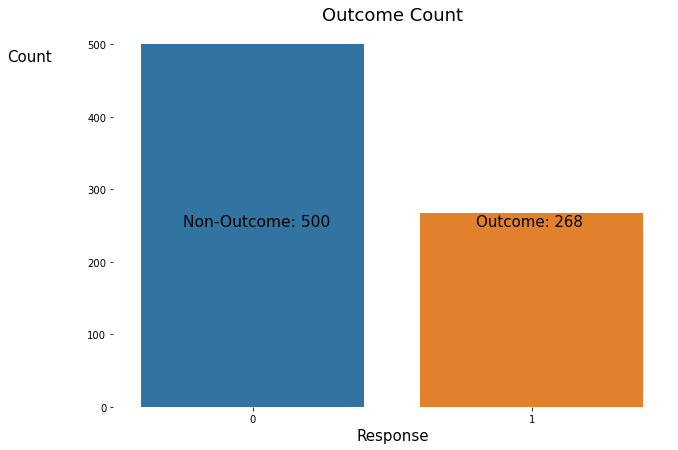

In [11]:
outcome = df_clean['Outcome'].sum()
no_outcome = len(df_clean['Outcome']) - outcome

outcome_perc = round(outcome/len(df_clean['Outcome']) * 100, 1)
no_outcome_perc = round(no_outcome/len(df_clean['Outcome']) * 100, 1)

fig, ax = plt.subplots(figsize=(10,7))
sns.set_context('notebook', font_scale=1.2)

sns.countplot('Outcome', data = df_clean)
plt.annotate(f'Non-Outcome: {no_outcome}', 
             xy=(-0.25, 250),
            size=15.5)

plt.annotate('Outcome: {}'.format(outcome), 
             xy=(0.8, 250),
            size=15)

plt.annotate('{}%'.format(no_outcome_perc), xy=(-0.1, 1000),size=15)
plt.annotate('{}%'.format(outcome_perc), xy=(0.95, 1000),size=15)
plt.title('Outcome Count', size=18)
plt.xlabel("Response",size=15)
plt.ylabel('Count', rotation=0, 
           labelpad=40,
           size=15)
ax.yaxis.set_label_coords(-0.15,.9)
plt.box(False)

Bisa dilihat visualisasi diatas, data nya imbalance yang 0 (tidak) nilainya sebesar 500 dan 1 (yes) nilainya sebesar 268. yaitu pasien yang terkena tidak terkena diabetes lebih banyak dibanding yang terkena diabetes.

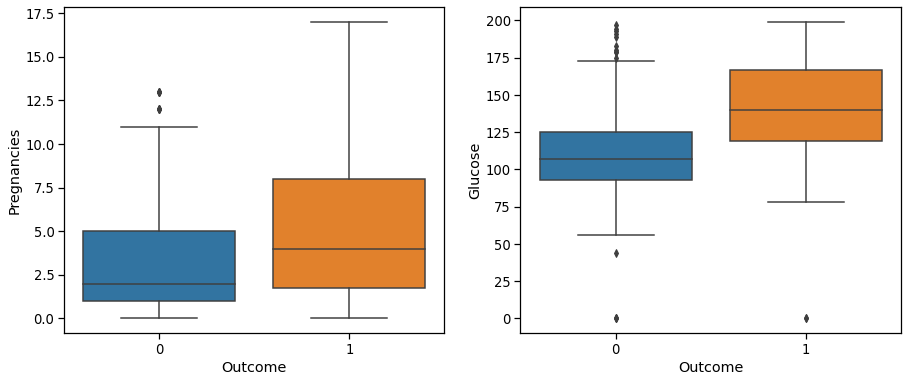

In [12]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(df_eda["Outcome"],df_eda["Pregnancies"])

plt.subplot(1,2,2)
sns.boxplot(df_eda["Outcome"],df_eda["Glucose"])
plt.show()

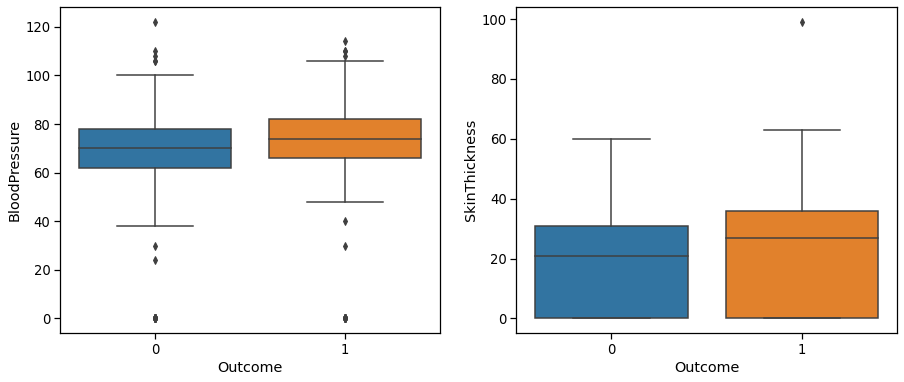

In [13]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(df_eda["Outcome"],df_eda["BloodPressure"])

plt.subplot(1,2,2)
sns.boxplot(df_eda["Outcome"],df_eda["SkinThickness"])
plt.show()

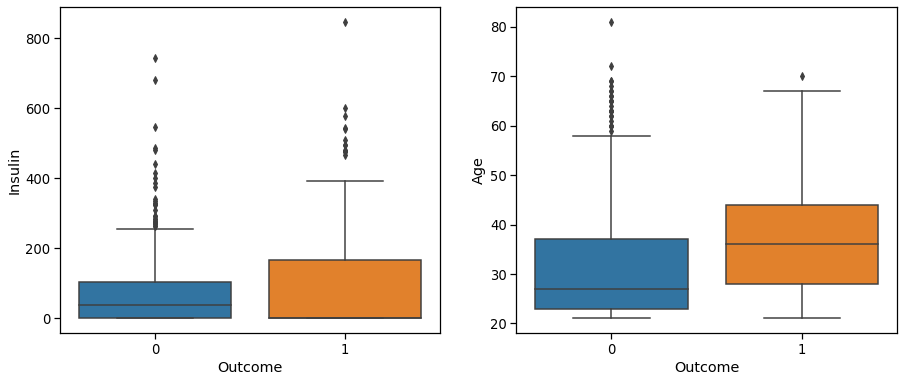

In [72]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(df_eda["Outcome"],df_eda["Insulin"])

plt.subplot(1,2,2)
sns.boxplot(df_eda["Outcome"],df_eda["Age"])
plt.show()

Dengan menganalisis karakteristik beberapa fitur, kita dapat menarik informasi sebagai berikut: 1 ya dan 0 tidak

* Kehamilan sangat mempengaruhi diabetes, terlihat dari visualisasi di atas orang hamil yang terkena diabeteslebih banyak dibandingkan yang tidak terkena diabetes.
* Glukosa yaitu gula darah yang sangat mempengaruhi diabetes
* Rata-rata BloodPressure, SkinThickness dan Insulin juga mempengaruhi Diabetes
* Rata-rat yang banyak terkena diabetes yaitu umur 28-45 Tahun.

# 6. Data Preprocessing

## Numerical Feature 

In [14]:
df_num = df_eda.drop('Outcome', axis=1)
df_num.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


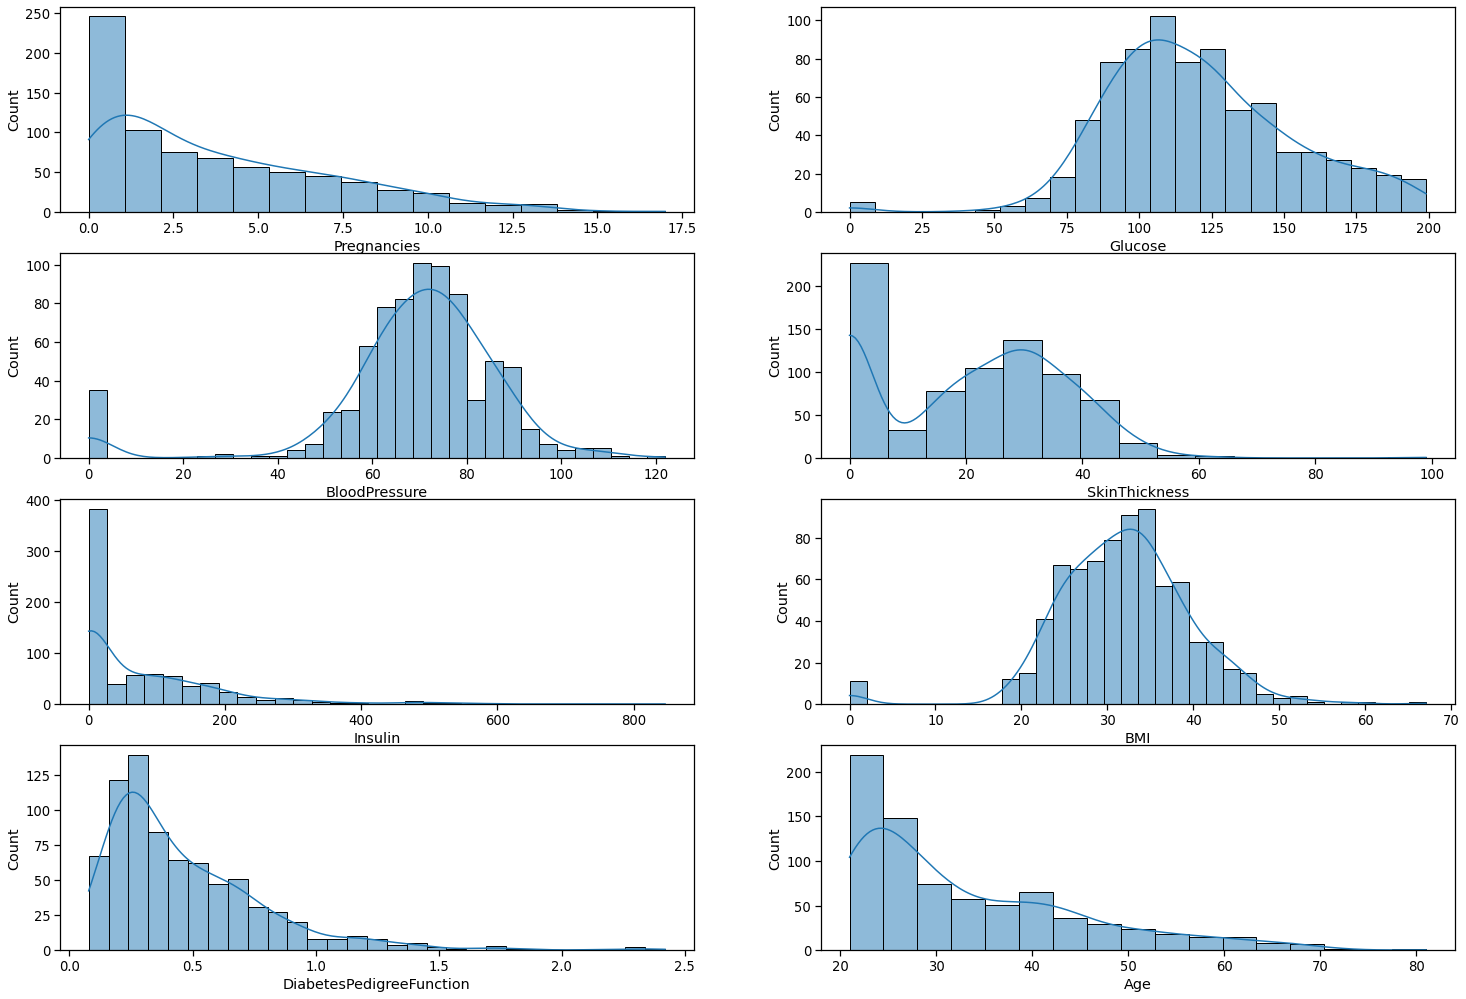

In [15]:
plt.figure(figsize=(25,40))
for i, col in enumerate(df_num.columns):
    if df_eda[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.histplot(df_eda[col], ax=ax, kde=True)
        plt.xlabel(col)
        
plt.show()

Bisa kita lihat histogram diatas terlihat ada data yang skewness dan normal.

In [16]:
for i, col in enumerate(df_num.columns):
    print('Skewness Value',(col),':', df_num[col].skew())

Skewness Value Pregnancies : 0.9016739791518588
Skewness Value Glucose : 0.17375350179188992
Skewness Value BloodPressure : -1.8436079833551302
Skewness Value SkinThickness : 0.10937249648187608
Skewness Value Insulin : 2.272250858431574
Skewness Value BMI : -0.42898158845356543
Skewness Value DiabetesPedigreeFunction : 1.919911066307204
Skewness Value Age : 1.1295967011444805


In [17]:
for k in df_num:
  Q3 = df_num[k].quantile(.75)
  Q1 = df_num[k].quantile(.15)

  IQR = Q3 - Q1

  upper = Q3 + (3 * IQR)
  lower = Q1 - (3 * IQR)

  outlier = df_num[(df_num[k] > upper) | (df_num[k] < lower)]
  print(k)
  print('count of outlier: ', outlier.shape[0])
  print('percent k of outlier: ', outlier.shape[0]/df_num.shape[0] * 100, '%')
  print('='*70)

Pregnancies
count of outlier:  0
percent k of outlier:  0.0 %
Glucose
count of outlier:  0
percent k of outlier:  0.0 %
BloodPressure
count of outlier:  0
percent k of outlier:  0.0 %
SkinThickness
count of outlier:  0
percent k of outlier:  0.0 %
Insulin
count of outlier:  9
percent k of outlier:  1.171875 %
BMI
count of outlier:  0
percent k of outlier:  0.0 %
DiabetesPedigreeFunction
count of outlier:  4
percent k of outlier:  0.5208333333333333 %
Age
count of outlier:  0
percent k of outlier:  0.0 %


Kemudian Handling Winsoriser menggunakan IQR karena kebanyakan data nya normal, berikut codingan untuk winsoriser :

In [18]:
win = Winsorizer(capping_method='iqr', tail='both', fold=3, variables=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
win.fit(df_num)
df_eda_cleaned = win.fit_transform(df_num)

In [19]:
print('before handling: \n', df_eda.describe())

before handling: 
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.00000

In [20]:
print('after handling: \n', df_eda_cleaned.describe())

after handling: 
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.470052      20.536458   78.489583   
std       3.369578   31.972618      18.082576      15.952218  108.966736   
min       0.000000    0.000000       8.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  509.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.989193                  0.469005   33.240885  
std      7.869611                  0.317492   11.760232  
min      0.000000                  0.078000   21.000000  
25%    

# 7. Feature Selection 

Berikut ini adalah pemilihan Fitur yang dilanjutkan dalam pemilihan model : 

In [21]:
df_eda_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72.0,35,0.0,33.6,0.62700,50
1,1,85,66.0,29,0.0,26.6,0.35100,31
2,8,183,64.0,0,0.0,23.3,0.67200,32
3,1,89,66.0,23,94.0,28.1,0.16700,21
4,0,137,40.0,35,168.0,43.1,1.77375,33


In [22]:
df_eda_cleaned['Outcome'] = df_eda['Outcome']

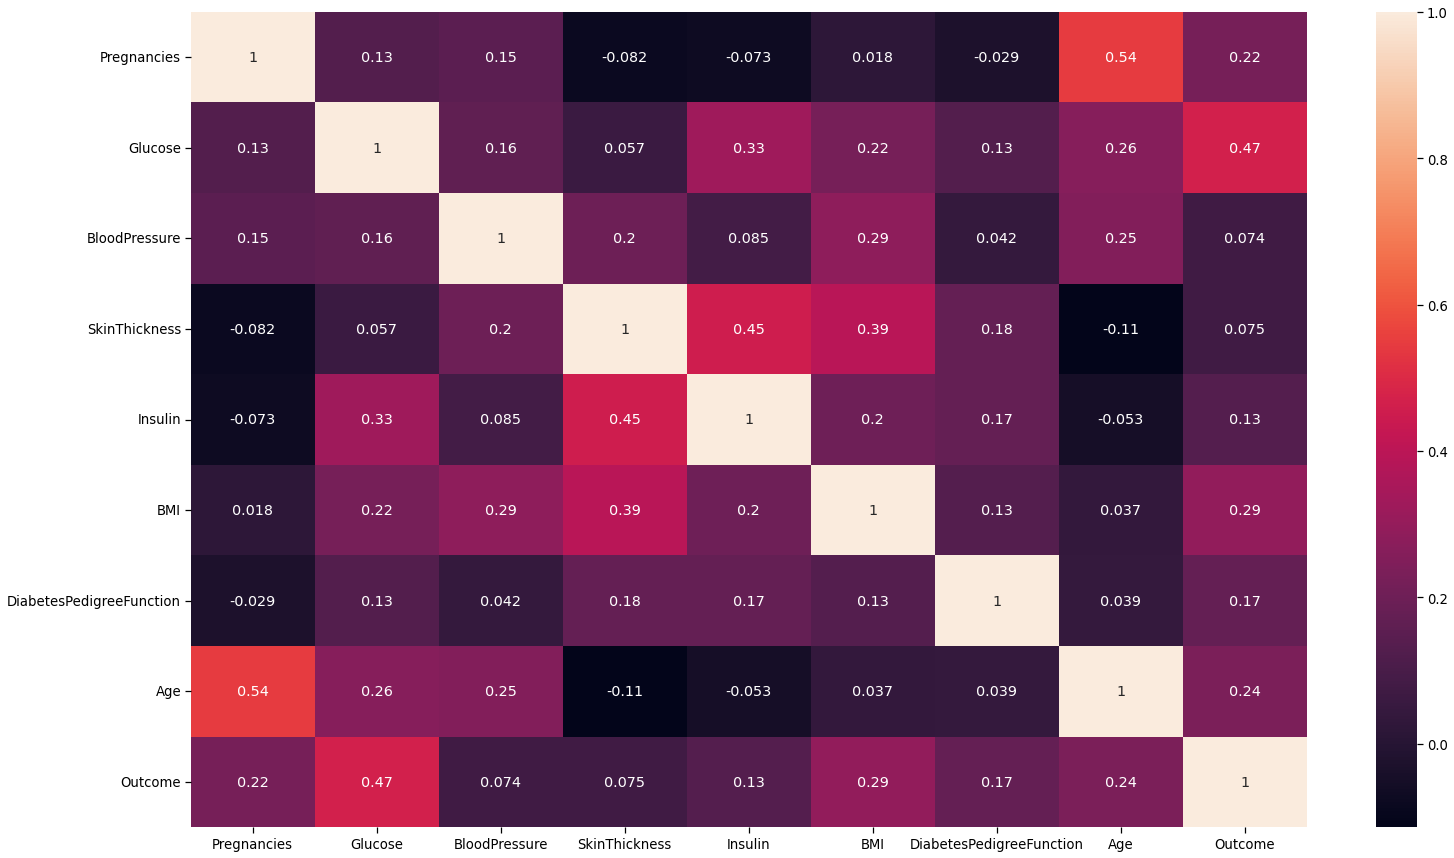

In [23]:
fig,ax = plt.subplots(figsize=[25,15])

corr = df_eda_cleaned.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

Berdasarkan heatmap di atas, terlihat bahwa fitur BloodPressure dan SkinThickness mempunya nilai korelasi rendah akan tetapi fitur tersebut akan saya gunakan untuk proyek saya lebih lanjut karena mendukung prediksi terhadap target yaitu `Outcome`. Oleh karena itu, semua fitur numerik tersebut akan saya gunakan untuk membuat model saya.

In [24]:
df_eda_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0.0,33.6,0.62700,50,1
1,1,85,66.0,29,0.0,26.6,0.35100,31,0
2,8,183,64.0,0,0.0,23.3,0.67200,32,1
3,1,89,66.0,23,94.0,28.1,0.16700,21,0
4,0,137,40.0,35,168.0,43.1,1.77375,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180.0,32.9,0.17100,63,0
764,2,122,70.0,27,0.0,36.8,0.34000,27,0
765,5,121,72.0,23,112.0,26.2,0.24500,30,0
766,1,126,60.0,0,0.0,30.1,0.34900,47,1


# 8. Model Inference

Untuk model inferensi, saya hanya mengambil 10 data acak.

In [25]:
df_inf = df_eda_cleaned.sample(10, random_state=17)
df_inf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
649,0,107,60.0,25,0.0,26.4,0.133,23,0
516,9,145,88.0,34,165.0,30.3,0.771,53,1
151,4,114,65.0,0,0.0,21.9,0.432,37,0
381,0,105,68.0,22,0.0,20.0,0.236,22,0
325,1,157,72.0,21,168.0,25.6,0.123,24,0
473,7,136,90.0,0,0.0,29.9,0.210,50,0
736,0,126,86.0,27,120.0,27.4,0.515,21,0
300,0,167,8.0,0,0.0,32.3,0.839,30,1
662,8,167,106.0,46,231.0,37.6,0.165,43,1
484,0,145,8.0,0,0.0,44.2,0.630,31,1


Dropping Inference from Data

In [26]:
df_train_test = df_eda_cleaned.drop(df_inf.index)
df_train_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0.0,33.6,0.62700,50,1
1,1,85,66.0,29,0.0,26.6,0.35100,31,0
2,8,183,64.0,0,0.0,23.3,0.67200,32,1
3,1,89,66.0,23,94.0,28.1,0.16700,21,0
4,0,137,40.0,35,168.0,43.1,1.77375,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180.0,32.9,0.17100,63,0
764,2,122,70.0,27,0.0,36.8,0.34000,27,0
765,5,121,72.0,23,112.0,26.2,0.24500,30,0
766,1,126,60.0,0,0.0,30.1,0.34900,47,1


In [27]:
df_train_test.reset_index(drop=True, inplace=True) 
df_inf.reset_index(drop=True, inplace=True)

In [28]:
df_inf.shape

(10, 9)

# 9. Splitting Train and Test Data

Berikut saya akan split data untuk data train dan test.

In [29]:
X = df_train_test.drop('Outcome', axis=1)
y = df_train_test['Outcome']
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72.0,35,0.0,33.6,0.62700,50
1,1,85,66.0,29,0.0,26.6,0.35100,31
2,8,183,64.0,0,0.0,23.3,0.67200,32
3,1,89,66.0,23,94.0,28.1,0.16700,21
4,0,137,40.0,35,168.0,43.1,1.77375,33
...,...,...,...,...,...,...,...,...
753,10,101,76.0,48,180.0,32.9,0.17100,63
754,2,122,70.0,27,0.0,36.8,0.34000,27
755,5,121,72.0,23,112.0,26.2,0.24500,30
756,1,126,60.0,0,0.0,30.1,0.34900,47


In [30]:
train, test = train_test_split(df_train_test, test_size=0.25, stratify=y, random_state=1)

print('Train size: ', train.shape)
print('Test size: ', test.shape)

Train size:  (568, 9)
Test size:  (190, 9)


In [31]:
X_train = train.drop(columns='Outcome')
y_train = train['Outcome']

X_test = test.drop(columns='Outcome')
y_test = test['Outcome']

# 10. Scaling

Saya akan menskalakan fitur numerik dengan menggunakan StandarScaler.

In [32]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# 11. PIPELINE

Di seksi ini saya akan menggunakan pipeline dalam proses lebih lanjut seperti model evaluation.

In [38]:
num_pipeline = Pipeline([
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=3)),
        ('scaler', StandardScaler())
    ])

num_tr = num_pipeline.fit_transform(X_train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
num_tr

array([[ 0.02729489,  0.4180367 ,  0.14148936, ..., -1.0501346 ,
        -0.62449943,  2.29408283],
       [-0.55774268, -0.10653281,  1.14956407, ..., -0.87172435,
        -0.51366665, -1.04177924],
       [-0.85026146, -0.07567578, -0.64256875, ...,  0.16050641,
        -0.67375844, -0.87070939],
       ...,
       [-0.55774268, -1.15567183, -0.19453554, ...,  0.02032692,
         0.05281197, -0.95624432],
       [ 1.78240759, -0.16824687,  1.59759727, ..., -1.02464742,
         1.66912325,  0.07017478],
       [ 0.31981367,  1.15860542,  0.81353916, ...,  0.93786537,
        -0.26121422, -0.35749984]])

In [39]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']),
    ])

train_tr = full_pipeline.fit_transform(X_train)
train_tr

array([[ 0.02729489,  0.4180367 ,  0.14148936, ..., -1.0501346 ,
        -0.62449943,  2.29408283],
       [-0.55774268, -0.10653281,  1.14956407, ..., -0.87172435,
        -0.51366665, -1.04177924],
       [-0.85026146, -0.07567578, -0.64256875, ...,  0.16050641,
        -0.67375844, -0.87070939],
       ...,
       [-0.55774268, -1.15567183, -0.19453554, ...,  0.02032692,
         0.05281197, -0.95624432],
       [ 1.78240759, -0.16824687,  1.59759727, ..., -1.02464742,
         1.66912325,  0.07017478],
       [ 0.31981367,  1.15860542,  0.81353916, ...,  0.93786537,
        -0.26121422, -0.35749984]])

In [40]:
train_tr.shape

(568, 8)

In [41]:
X_train.shape

(568, 8)

In [42]:
train_manual = np.array(X_train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

np.allclose(train_tr, train_manual)

False

In [43]:
test_tr = full_pipeline.transform(X_test)
test_tr

array([[-1.14278025, -0.60024529, -0.25053969, ..., -0.94818588,
        -0.74764695, -0.95624432],
       [ 1.19737002,  2.08431632,  0.47751426, ...,  2.02107048,
        -1.05551577,  0.8399891 ],
       [ 0.61233245, -0.47681717,  0.58952256, ...,  0.05855769,
         1.22579216, -0.61410462],
       ...,
       [-0.2652239 ,  1.15860542, -0.30654384, ..., -0.10710897,
        -0.56908304, -0.78517447],
       [ 0.90485124, -0.44596014,  1.26157237, ..., -1.19031409,
        -0.75380433,  1.26766373],
       [ 1.78240759,  0.04775234,  0.47751426, ..., -0.5658782 ,
         0.09899229,  1.01105895]])

# 12. Machine Learning Models 

Pada bagian ini saya membuat model pembelajaran maching. Model yang akan saya buat adalah :

* Logistic Regression
* KNN
* AdaBoost
* Random Forest

Juga nanti di bagian ini saya akan melakukan GridSearch berdasarkan model terbaik yang saya latih.

# 12.1 Model Building

In [44]:
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
rfc = RandomForestClassifier(random_state=0)
adb = AdaBoostClassifier()

# 12.2 MODEL EVALUATION

### Logistic Regression

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       370
           1       0.74      0.58      0.65       198

    accuracy                           0.78       568
   macro avg       0.77      0.73      0.74       568
weighted avg       0.78      0.78      0.77       568

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       124
           1       0.69      0.52      0.59        66

    accuracy                           0.75       190
   macro avg       0.73      0.70      0.71       190
weighted avg       0.75      0.75      0.74       190

Confusion Matrix      : 


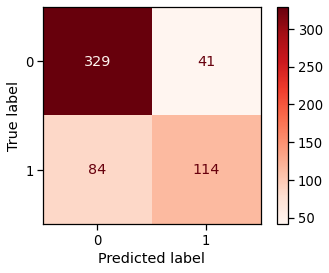

In [49]:
logreg.fit(train_tr, y_train)

lr_train = logreg.predict(train_tr)
lr_test = logreg.predict(test_tr)

print(classification_report(y_train, lr_train))
print(classification_report(y_test, lr_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(logreg, train_tr, y_train, cmap='Reds'))

Berdasarkan model Logistic Regression yang telah dibuat, maka confusion matrix yang didapat menyebutkan ada 329 data yang diprediksi menjadi Tidak Diabetes, ada 41 data Tidak Diabetes yang diprediksi menjadi Diabetes. Kemudian ada 84 data Diabetes yang diprediksi sebagai Tidak Diabetes dan 114 data Diabetes yang diprediksi benar Daibetes.

### KNN

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       370
           1       0.81      0.73      0.77       198

    accuracy                           0.85       568
   macro avg       0.84      0.82      0.83       568
weighted avg       0.85      0.85      0.84       568

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       124
           1       0.58      0.50      0.54        66

    accuracy                           0.70       190
   macro avg       0.67      0.65      0.66       190
weighted avg       0.69      0.70      0.69       190

Confusion Matrix      : 


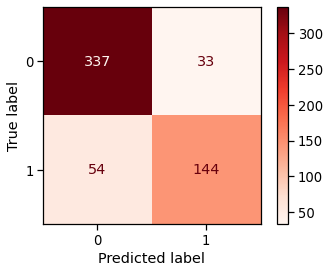

In [50]:
knn.fit(train_tr, y_train)

knn_train = knn.predict(train_tr)
knn_test = knn.predict(test_tr)

print(classification_report(y_train, knn_train))
print(classification_report(y_test, knn_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn, train_tr, y_train, cmap='Reds'))

Berdasarkan model Logistic Regression yang telah dibuat, maka confusion matrix yang didapat menyebutkan ada 337 data yang diprediksi menjadi Tidak Diabetes, ada 33 data Tidak Diabetes yang diprediksi menjadi Diabetes. Kemudian ada 54 data Diabetes yang diprediksi sebagai Tidak Diabetes dan 144 data Diabetes yang diprediksi benar Daibetes.

### Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       370
           1       1.00      1.00      1.00       198

    accuracy                           1.00       568
   macro avg       1.00      1.00      1.00       568
weighted avg       1.00      1.00      1.00       568

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       124
           1       0.61      0.55      0.58        66

    accuracy                           0.72       190
   macro avg       0.69      0.68      0.68       190
weighted avg       0.72      0.72      0.72       190

Confusion Matrix      : 


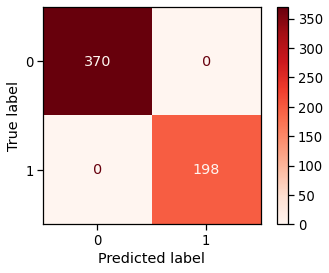

In [51]:
rfc.fit(train_tr, y_train)

rfc_train = rfc.predict(train_tr)
rfc_test = rfc.predict(test_tr)

print(classification_report(y_train, rfc_train))
print(classification_report(y_test, rfc_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rfc, train_tr, y_train, cmap='Reds'))

Berdasarkan model Logistic Regression yang telah dibuat, maka confusion matrix yang didapat menyebutkan ada 370 data yang diprediksi menjadi Tidak Diabetes, ada 0 data Tidak Diabetes yang diprediksi menjadi Diabetes. Kemudian ada 0 data Diabetes yang diprediksi sebagai Tidak Diabetes dan 198 data Diabetes yang diprediksi benar Daibetes.

### AdaBoost

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       370
           1       0.79      0.78      0.79       198

    accuracy                           0.85       568
   macro avg       0.84      0.83      0.84       568
weighted avg       0.85      0.85      0.85       568

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       124
           1       0.59      0.58      0.58        66

    accuracy                           0.72       190
   macro avg       0.69      0.68      0.68       190
weighted avg       0.71      0.72      0.71       190

Confusion Matrix      : 


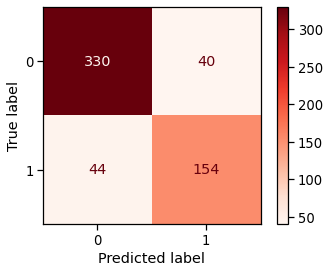

In [52]:
adb.fit(train_tr, y_train)

adb_train = adb.predict(train_tr)
adb_test = adb.predict(test_tr)

print(classification_report(y_train, adb_train))
print(classification_report(y_test, adb_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(adb, train_tr, y_train, cmap='Reds'))

Berdasarkan model Logistic Regression yang telah dibuat, maka confusion matrix yang didapat menyebutkan ada 330 data yang diprediksi menjadi Tidak Diabetes, ada 40 data Tidak Diabetes yang diprediksi menjadi Diabetes. Kemudian ada 44 data Diabetes yang diprediksi sebagai Tidak Diabetes dan 154 data Diabetes yang diprediksi benar Daibetes.

# 13. Cross Validation

Untuk mendapatkan nilai cross validation diambil dari nilai akurasinya

### Logistic Regression

In [53]:
cv_logrec = cross_val_score(logreg,train_tr, y_train, cv=3, scoring='accuracy')

print('LogisticRegression')
print('accuracy Score - All - Cross Validation  : ', cv_logrec)
print('accuracy Score - Mean - Cross Validation : ', cv_logrec.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_logrec.std())
print('accuracy Score - Range of Test-Set       : ', (cv_logrec.mean()-cv_logrec.std()) , '-', (cv_logrec.mean()+cv_logrec.std()))

LogisticRegression
accuracy Score - All - Cross Validation  :  [0.79473684 0.77777778 0.74074074]
accuracy Score - Mean - Cross Validation :  0.7710851202079271
accuracy Score - Std - Cross Validation  :  0.02254607858959669
accuracy Score - Range of Test-Set       :  0.7485390416183304 - 0.7936311987975238


### KNN

In [54]:
cv_knn = cross_val_score(knn,train_tr, y_train, cv=3, scoring='accuracy')

print('KNN')
print('accuracy Score - All - Cross Validation  : ', cv_knn)
print('accuracy Score - Mean - Cross Validation : ', cv_knn.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_knn.std())
print('accuracy Score - Range of Test-Set       : ', (cv_knn.mean()-cv_knn.std()) , '-', (cv_knn.mean()+cv_knn.std()))

KNN
accuracy Score - All - Cross Validation  :  [0.73684211 0.71957672 0.71428571]
accuracy Score - Mean - Cross Validation :  0.7235681797085306
accuracy Score - Std - Cross Validation  :  0.009631424573402141
accuracy Score - Range of Test-Set       :  0.7139367551351284 - 0.7331996042819328


### Random Forest

In [55]:
cv_rfc = cross_val_score(rfc,train_tr, y_train, cv=3, scoring='accuracy')

print('RandomForest')
print('accuracy Score - All - Cross Validation  : ', cv_rfc)
print('accuracy Score - Mean - Cross Validation : ', cv_rfc.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_rfc.std())
print('accuracy Score - Range of Test-Set       : ', (cv_rfc.mean()-cv_rfc.std()) , '-', (cv_rfc.mean()+cv_rfc.std()))

RandomForest
accuracy Score - All - Cross Validation  :  [0.82631579 0.7989418  0.73544974]
accuracy Score - Mean - Cross Validation :  0.7869024412884063
accuracy Score - Std - Cross Validation  :  0.03806021144625556
accuracy Score - Range of Test-Set       :  0.7488422298421507 - 0.8249626527346618


### AdaBoost

In [56]:
cv_adb = cross_val_score(adb,X_train_smote, y_train_smote, cv=3, scoring='accuracy')

print('AdaBoostClassifier')
print('accuracy Score - All - Cross Validation  : ', cv_adb)
print('accuracy Score - Mean - Cross Validation : ', cv_adb.mean())
print('accuracy Score - Std - Cross Validation  : ', cv_adb.std())
print('accuracy Score - Range of Test-Set       : ', (cv_adb.mean()-cv_adb.std()) , '-', (cv_adb.mean()+cv_adb.std()))

AdaBoostClassifier
accuracy Score - All - Cross Validation  :  [0.74898785 0.73279352 0.77642276]
accuracy Score - Mean - Cross Validation :  0.7527347135819537
accuracy Score - Std - Cross Validation  :  0.018007533694631973
accuracy Score - Range of Test-Set       :  0.7347271798873217 - 0.7707422472765856


In [57]:
crossval = [cv_logrec, cv_rfc, cv_knn, cv_adb]
mean = []
std = []
for i in crossval:
    mean.append(i.mean())
    std.append(i.std())
model = ['Logistic Regression', 'Random Forest', 'KNN', 'AdaBoost Classifier']
bestmodel = pd.DataFrame(model)
bestmodel['Mean']=np.round(mean,3)
bestmodel['Std']=np.round(std,3)
bestmodel.rename(columns={0:'Model'},inplace = True)
bestmodel.sort_values(by= 'Mean' , ascending = False).reset_index(drop=True)

,Model,Mean,Std
0,Random Forest,0.787,0.038
1,Logistic Regression,0.771,0.023
2,AdaBoost Classifier,0.753,0.018
3,KNN,0.724,0.010


Saya akan memilih Random Forest untuk di Hyperparameter Tuning karena Nilai Mean nya sebesar 0.787 dan nilai Standar Deviasi nya sebesar 0.038 agar nilai rentang persebaran datanya makin bagus.

# 14. Hyperparameter Tuning

karena Random Forest paling tinggi Mean nya dan STD nya rendah jadi kita pakai Random Forest Regression

In [58]:
y_train.isnull().sum().sum()

0

In [59]:
params = [
    {'n_estimators': [20, 40, 60, 80],
     'max_features': [1, 3, 5, 7],
     'max_depth': [5, 10, 15, 20],
     'criterion': ['gini', 'entropy', 'log_loss'],
     'class_weight' : ['balanced', 'balanced_subsample']}
  ]

In [60]:
grid_search = GridSearchCV(rfc, params, cv=5,
                           scoring='precision',
                           return_train_score=True)
grid_search.fit(train_tr, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid=[{'class_weight': ['balanced', 'balanced_subsample'],
                          'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [5, 10, 15, 20],
                          'max_features': [1, 3, 5, 7],
                          'n_estimators': [20, 40, 60, 80]}],
             return_train_score=True, scoring='precision')

In [61]:
print('best params:', grid_search.best_params_)
print('best score:', grid_search.best_score_)

best params: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'max_features': 5, 'n_estimators': 20}
best score: 0.7421153798762907


In [62]:
rf = grid_search.best_estimator_
print(rf)

RandomForestClassifier(class_weight='balanced', max_depth=15, max_features=5,
                       n_estimators=20, random_state=0)


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       370
           1       1.00      0.99      0.99       198

    accuracy                           1.00       568
   macro avg       1.00      0.99      1.00       568
weighted avg       1.00      1.00      1.00       568

              precision    recall  f1-score   support

           0       0.72      0.82      0.77       124
           1       0.55      0.41      0.47        66

    accuracy                           0.68       190
   macro avg       0.64      0.62      0.62       190
weighted avg       0.66      0.68      0.67       190

Confusion Matrix      : 


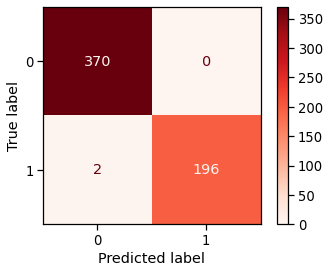

In [63]:
rf_train = rf.predict(train_tr)
rf_test = rf.predict(test_tr)

print(classification_report(y_train, rf_train))
print(classification_report(y_test, rf_test))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf, train_tr, y_train, cmap='Reds'))

Interpretasi yang dapat diperoleh dari data uji laporan klasifikasi di atas adalah:

Precision: dari semua orang yang diprediksi akan churn oleh model, 55% benar.
Recall : dari semua pasien yang diabetes, model hanya memprediksi hasil ini dengan benar untuk 41% dari pasien tersebut.
F-1 Score: menunjukkan seberapa akurat model karena semakin dekat nilai F-1, semakin akurat model tersebut. Dalam hal ini model Random Forest yang telah dibuat memiliki skor 0,47 dari 1,00. Model bagus tapi masih perlu beberapa perbaikan.

In [64]:
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('outlier',
                                                  Winsorizer(capping_method='iqr',
                                                             tail='both')),
                                                 ('scaler', StandardScaler())]),
                                 ['Pregnancies', 'Glucose', 'BloodPressure',
                                  'SkinThickness', 'Insulin', 'BMI',
                                  'DiabetesPedigreeFunction', 'Age'])])

In [65]:
all_process = Pipeline([
    ("preprocess", full_pipeline),
    ("classification", rf)
])

all_process.fit(X_train, y_train)
hasil = all_process.predict(X_test)

print(classification_report(y_test, hasil))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77       124
           1       0.55      0.41      0.47        66

    accuracy                           0.68       190
   macro avg       0.64      0.62      0.62       190
weighted avg       0.66      0.68      0.67       190



Bisa kita lihat diatas, saya masukan winsoriser dan standarscaler untuk di Pipeline. Hasil dari prediksi pipeline didapatkan nilai recall untuk nilai 1 = 0.41 artinya model kurang bagus.

# 15. Model Inference

In [73]:
df_inf.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,107,60.0,25,0.0,26.4,0.133,23,0
1,9,145,88.0,34,165.0,30.3,0.771,53,1
2,4,114,65.0,0,0.0,21.9,0.432,37,0
3,0,105,68.0,22,0.0,20.0,0.236,22,0
4,1,157,72.0,21,168.0,25.6,0.123,24,0


In [66]:
all_process.predict(df_inf)

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

Didaptkan dari hasil infrenece jika dibandingkan dengan data asli, hasil prediksi betul sesuai dengan data aslinya.

# 16. Model Inference - Deploy

In [67]:
import pickle 

# save model
pickle.dump(all_process, open("M2P1_pred.pkl", "wb"))

In [68]:
# STEP 1 - Import save moddel
model = pickle.load(open("M2P1_pred.pkl", "rb"))

In [69]:
# STEP 2 - Prepare input data from user 
inf = df_inf.head(5)
inf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,107,60.0,25,0.0,26.4,0.133,23,0
1,9,145,88.0,34,165.0,30.3,0.771,53,1
2,4,114,65.0,0,0.0,21.9,0.432,37,0
3,0,105,68.0,22,0.0,20.0,0.236,22,0
4,1,157,72.0,21,168.0,25.6,0.123,24,0


In [70]:
# STEP 3 - model predict input data
final = model.predict(inf).tolist()[0]
final

0

In [71]:
# STEP 4 - interpretation for human language 
if final == 0:
    print("You're Diabetes")
else:
    print("You're not Diabetes")

You're Diabetes


# 16. Conclusion

Dari overall analysis dapat disimpulkan bahwa:

1. Pada milestone ini dilakukan pembuatan beberapa model machine learning Supervised Classification untuk memprediksi pasien yang mengidap penyakit Diabetes dari dataset Diabetes Prediction Dataset yang terdiri dari 768 entri data dan 9 kolom

2. Pada kolom Category dilakukan feature engineering yang mana label 0=Outcome akan didefinisikan sebagai label 0 atau Outcome yang mana pasien tidak mengidap penyakit Daibetes, Sedangkan label 1=Outcome akan didefinisikan sebagai label 0 atau Hepatitis C yang berarti pasien mengidap penyakit Diabetes.

3. Scoring yang di gunakan pada milestone ini adalah recall, dikarnakan pada kasus data ini ingin difokuskan mengurangi kesalahan negatif yang mana label 1 pada kolom Target yang berarti pasien mengidap penyakit Daibetes didefinisikan sebagai kelas positif. Sehingga dengan menggunakan scoring recall, kita menghindari kesalahan prediksi pada label 1, atau dengan kata lain mengurangi kesalahan negatif.

4. Feature Scaling pada kolom numerik dengan menggunkana StandarScaler.

5. Dilakukan pembuatan pipeline pada proses preprocessing dan modeling.

6. Pada Model definition terdapat beberapa model yang digunakan yaitu model:
 - Logistic Regression
 - KNN
 - RandomForestClassifier
 - AdaBoost

7. Dari model - model diatas, dilakukan cross validation untuk menentukan model terbaik berdasarkan nilai mean dan nilai standar deviasinya. Berdasarkan hasil cross validation diperoleh model terbaik yaitu model Random Forest dengan nilai mean 0.787 dan nilai standar deviasi 0.038.

8. Setelah melakukan cross validation, selanjutnya dilakukan hyperparameter tuning terhadap model yang sudah ditentukan, sehingga dengan menggunakan hyperparameter tuning diperoleh best parameter model Random Forest adalah sebagai berikut:
- class_weight = balanced 
- max_depth = 15
- max_features = 5
- n_estimators = 20
- random_state = 0

9. Berdasarkan classification_report diketahui bahwa model Random Forest setelah melakukan hyperparameter tuning memiliki model yang overfit dilihat dari performa nilai recall test memiliki rendah dibanding performa train. 